In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

https://velog.io/@myway00/npm-%EC%97%90%EB%9F%AC-npm%EC%9D%80%EB%8A%94-%EB%82%B4%EB%B6%80-%EB%98%90%EB%8A%94-%EC%99%B8%EB%B6%80-%EB%AA%85%EB%A0%B9-%EC%8B%A4%ED%96%89%ED%95%A0-%EC%88%98-%EC%9E%88%EB%8A%94-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8-%EB%98%90%EB%8A%94-%EB%B0%B0%EC%B9%98-%ED%8C%8C%EC%9D%BC%EC%9D%B4-%EC%95%84%EB%8B%99%EB%8B%88%EB%8B%A4.-npm-npm-%EC%9A%A9%EC%96%B4%EA%B0%80-cmdlet-%ED%95%A8%EC%88%98-%EC%8A%A4%ED%81%AC%EB%A6%BD%ED%8A%B8-%ED%8C%8C%EC%9D%BC-%EB%98%90%EB%8A%94-%EC%8B%A4%ED%96%89%ED%95%A0-%EC%88%98-%EC%9E%88%EB%8A%94-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8-%EC%9D%B4%EB%A6%84%EC%9C%BC%EB%A1%9C-%EC%9D%B8%EC%8B%9D%EB%90%98%EC%A7%80-%EC%95%8A%EC%8A%B5%EB%8B%88%EB%8B%A4.-%EC%9D%B4%EB%A6%84%EC%9D%B4-%EC%A0%95%ED%99%95%ED%95%9C%EC%A7%80-%ED%99%95%EC%9D%B8%ED%95%98%EA%B3%A0-%EA%B2%BD%EB%A1%9C%EA%B0%80-%ED%8F%AC%ED%95%A8%EB%90%9C-%EA%B2%BD%EC%9A%B0-%EA%B2%BD%EB%A1%9C%EA%B0%80-%EC%98%AC%EB%B0%94%EB%A5%B8%EC%A7%80-%EA%B2%80%EC%A6%9D%ED%95%9C-%EB%8B%A4%EC%9D%8C-%EB%8B%A4%EC%8B%9C-%EC%8B%9C%EB%8F%84%ED%95%98%EC%8B%AD%EC%8B%9C%EC%98%A4

### 1. data preprocessing

#### 1. Load the dataset

In [2]:
card_df = pd.read_csv('../data/creditcard.csv')

#### 2. EDA

In [3]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
card_df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [16]:
card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
pd.unique(card_df['Class'])

array([0, 1], dtype=int64)

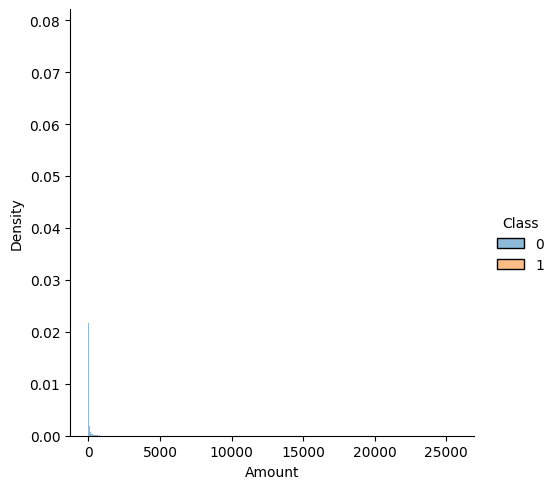

In [14]:
sns.displot(data=card_df, x='Amount', hue='Class', stat='density')

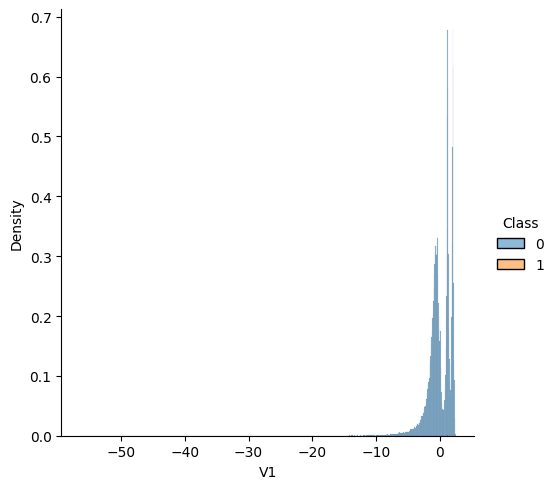

In [38]:
sns.displot(data=card_df, x='V1', hue='Class', stat='density')

#### 2. data split

In [21]:
from sklearn.model_selection import train_test_split

##### case1

In [22]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [23]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    # target 변수가 데이터 프레임에서 가장 마지막 열에 있을 경우
    x_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:,-1]
    
    x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=0, stratify=y_target)
    return x_train, x_test, y_train, y_test

In [24]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [26]:
df_copy = get_preprocessed_df(card_df)

##### case2

- Amount의 로그 변환

In [41]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 로그변환
    amount_n = np.log1p(df_copy['Amount']) 
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [42]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

##### case3

- 이상치 제거 : 
- 1) 먼저 어떤 피처의 이상치 데이터를 검출할 것인지 선택이 필요하다.
- 2) 매우 많은 피처들이 있을 경우 결정값(타겟값, 레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋다.
- 3) 모든 피처들의 이상치를 검출하는 것은 시간이 많이 소모되며, 이상치를 제거하더라도 성능이 크게 향상되지 않을 수도 있다.
- 4) 타겟값과 상관관계가 높은 피처들에 대해서만 이상치를 제거하도록 한다.

<AxesSubplot:>

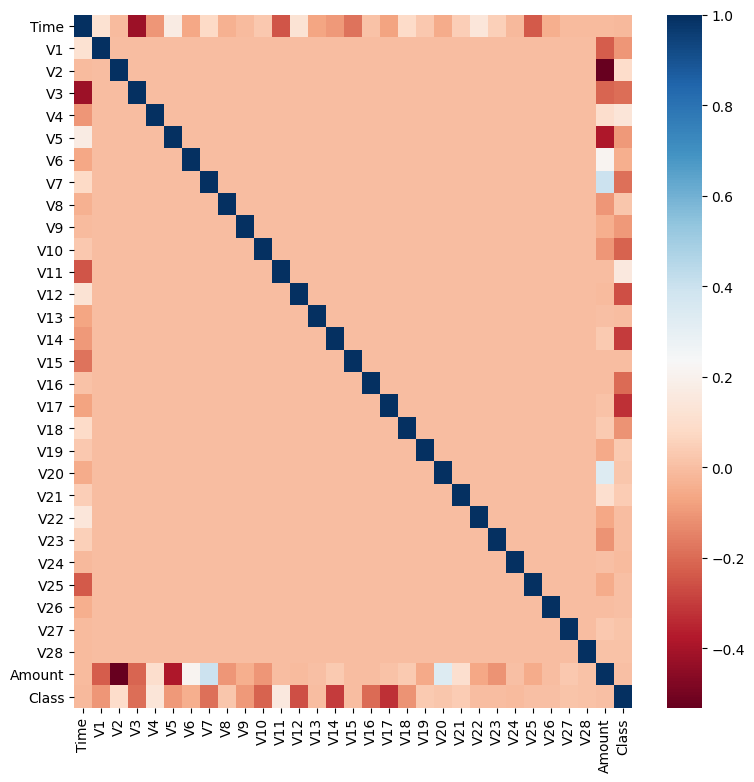

In [45]:
## 상관관계 파악 -> heatmap

import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [50]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
    fraud=df[df['Class']==1][column]
    

    quantile_25=np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)

    iqr=quantile_75-quantile_25
    iqr_weight=iqr*weight
    lowest_val=quantile_25-iqr_weight
    highest_val=quantile_75+iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

In [51]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


#### 3. model selection

In [30]:
## evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [43]:
from sklearn.linear_model import LogisticRegression

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727


In [36]:
# Estimator 객체와 학습/데이터 세트를 입력으로 받아 학습/예측/평가를 수행

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred=model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred, pred_proba)

In [44]:
from lightgbm import LGBMClassifier

print('### Light gradient boosting ###')

lgbm_clf = LGBMClassifier(n_estimator=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)


### Light gradient boosting ###
[LightGBM] [Warning] Unknown parameter: n_estimator
오차 행렬
[[85289     6]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9483, 재현율: 0.7432,    F1: 0.8333, AUC:0.9812
